In [33]:
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLParser import getionimage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json
import os

In [10]:
def hotspot_fill_2(img, per):
    q = np.quantile(img, per)
    img[img > q] = q
    return img

In [7]:
def plot_ion_image(mz, f, path):
    tol_ppm = mz * 3 / 1000000
    x = getionimage(f, mz, tol=tol_ppm, z=1, reduce_func=sum)
    x = hotspot_fill_2(x, 0.99)

    #%matplotlib notebook
    plt.imshow(x, cmap='viridis', interpolation ='nearest')
    plt.savefig(path, bbox_inches='tight')
    return path

# Manually plots METASPACE data from MSMS fragment search

See:
http://localhost:8888/notebooks/PycharmProjects/word2vec/database_expt_msms_to_METASPACE.ipynb

In [19]:
df = pd.read_pickle('ms_out_v3_test01.pickle')
df.head(5)

,id_x,par_frag,name,datasetId,formula,adduct,mz,fdr,moleculeNames,parent_y,n_frag_y,id_y
0,HMDB0003601,12f,(S)-Reticuline,2017-05-17_19h49m04s,C9H11O2,M[M]+,151.075336,0.20,"[HMDB0003601, 12f, (S)-Reticuline]",0,10,2
1,HMDB0003601,18f,(S)-Reticuline,2017-05-17_19h49m04s,C10H12NO2,M[M]+,178.086235,0.50,"[HMDB0003601, 18f, (S)-Reticuline]",0,10,1
2,HMDB0003601,19f,(S)-Reticuline,2017-05-17_19h49m04s,C11H14NO2,M[M]+,192.101885,0.50,"[HMDB0003601, 19f, (S)-Reticuline]",0,10,1
3,HMDB0003601,14f,(S)-Reticuline,2017-05-17_19h49m04s,C10H10NO,M[M]+,160.075671,0.05,"[HMDB0003601, 14f, (S)-Reticuline]",0,10,1
4,HMDB0003601,21f,(S)-Reticuline,2017-05-17_19h49m04s,C15H13O,M[M]+,209.096072,0.50,"[HMDB0003601, 21f, (S)-Reticuline]",0,10,1


In [8]:
f = ImzMLParser('/Users/dis/Desktop/whole_body_word_2_vec/datasets/wb xenograft in situ metabolomics test - rms_corrected.imzML')
f

In [41]:
def writeIonImg(x, path, f):
    mz = str(x.mz)[0:7]
    if 'p' in x.par_frag:
        title = x.id_x + '_' + 'parent' + '_' + mz
    else:
        title = x.id_x + '_' + 'fragment' + '_' + mz
    fn = path + title + '.png'
    return plot_ion_image(x.mz, f, fn)

HMDB0003601


/Users/dis/anaconda3/envs/lcenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


HMDB0001044
HMDB0000397
HMDB0062195
HMDB0003540
HMDB0001434
HMDB0001886
HMDB0000982
HMDB0001341
HMDB0029423
HMDB0000050
HMDB0000061
HMDB0000045
HMDB0001151
HMDB0003345
HMDB0000186
HMDB0001388
HMDB0000510
HMDB0000194
HMDB0000706
HMDB0003449
HMDB0000516
msmls133
HMDB0000033
HMDB0000055
HMDB0000064
HMDB0000562
HMDB0000095
HMDB0003416
HMDB0000660
HMDB0000143
HMDB0000122
HMDB0000163
HMDB0000169
HMDB0003418
HMDB0240209
msmls183
msmls189
HMDB0000085
HMDB0000153
HMDB0003073
HMDB0000152
HMDB0000661
HMDB0000132
HMDB0000133
HMDB0001201
HMDB0001397
HMDB0000714
HMDB0000157
msmls303
HMDB0001190
HMDB0000195
HMDB0000175
HMDB0028910
HMDB0000201
HMDB0000517
HMDB0000062
HMDB0033704
HMDB0012326
HMDB0000177
HMDB0000222
HMDB0001266
HMDB0000158
HMDB0032358
HMDB0028933
HMDB0011175
HMDB0034220
HMDB0006461
HMDB0006469
HMDB0010381
HMDB0010382
HMDB0010384
HMDB0002815
HMDB0062496
HMDB0037138
HMDB0001262
HMDB0000048
HMDB0011754
HMDB0000512
HMDB0062660
HMDB0004824
HMDB0001325
HMDB0002189
HMDB0034146
HMDB0005065
HMDB

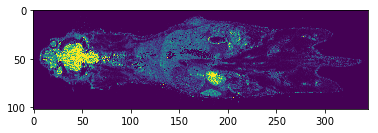

In [42]:
out_df = pd.DataFrame()
id_list = list(df.id_x.unique())
for x in id_list:
    print(x)
    path = "/Users/dis/PycharmProjects/word2vec/ion_images/" + x + '/'
    try:
        os.mkdir(path)
    except:
        pass
    temp_df = df[df.id_x == x]
    temp_df['imgIMS'] = temp_df.apply(lambda x: writeIonImg(x, path, f), 
                                      axis=1)
    out_df = pd.concat([out_df, temp_df])

In [45]:
out_df.loc[0].imgIMS

'/Users/dis/PycharmProjects/word2vec/ion_images/HMDB0003601/HMDB0003601_fragment_151.075.png'

In [46]:
out_df.to_pickle('word_2_vec_MSMS_test_01_2020Apr_17_CMBR.pickle')

In [17]:
title = df.loc[278].id_x
mz = df.loc[278].mz
path = "/Users/dis/PycharmProjects/word2vec/ion_images/" + title

'/Users/dis/PycharmProjects/word2vec/ion_images/HMDB0000036'

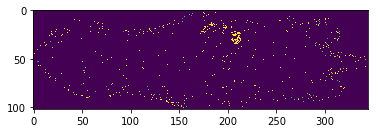

In [18]:
plot_ion_image(mz, f, path)